## Splitting the data

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, precision_recall_fscore_support, accuracy_score


data = pd.read_csv("data/matrixied.csv")

In [42]:
data.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2569,2570,2571,2572,2573,2574,2575,2576,2577,label
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.441014,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [43]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.3)

train_y = train_set["label"]
del train_set["label"]

test_y = test_set["label"]
del test_set["label"]

## Standardize the Data

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_set)

train_set = scaler.transform(train_set)
test_set = scaler.transform(test_set)

/home/maryana/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/maryana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/home/maryana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


## Reduce number of features using PCA

In [45]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(train_set)

train_set = pca.transform(train_set)
test_set = pca.transform(test_set)

In [46]:
pca.n_components_

286

## Training Naive Bayes classifier

In [47]:
from sklearn.naive_bayes import GaussianNB
from math import sqrt

NB_clf = GaussianNB().fit(train_set, train_y)
NB_pred_test = NB_clf.predict(test_set)

NB_RMSE = sqrt(mean_squared_error(NB_pred_test, test_y))
NB_score = accuracy_score(test_y, NB_pred_test)

NB_precision_pos, NB_recall_pos = precision_recall_fscore_support(test_y, NB_pred_test, pos_label=1, average='binary')[:2]
NB_precision_neg, NB_recall_neg = precision_recall_fscore_support(test_y, NB_pred_test, pos_label=0, average='binary')[:2]

In [48]:
print(NB_precision_pos)
print(NB_recall_pos)
print(NB_precision_neg)
print(NB_recall_neg)


0.5769230769230769
0.21428571428571427
0.5564516129032258
0.8625


## Training CART classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

CART_clf = DecisionTreeClassifier().fit(train_set, train_y)
CART_pred_test = CART_clf.predict(test_set)

CART_RMSE = sqrt(mean_squared_error(CART_pred_test, test_y))
CART_score = accuracy_score(test_y, CART_pred_test)

CART_precision_pos, CART_recall_pos = precision_recall_fscore_support(test_y, CART_pred_test, pos_label=1, average='binary')[:2]
CART_precision_neg, CART_recall_neg = precision_recall_fscore_support(test_y, CART_pred_test, pos_label=0, average='binary')[:2]

In [50]:
print(CART_precision_pos)
print(CART_recall_pos)
print(CART_precision_neg)
print(CART_recall_neg)


0.5
0.5714285714285714
0.5714285714285714
0.5


## Accuracy visualisation

In [51]:
import matplotlib.pyplot as plt

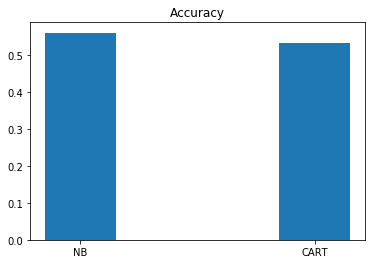

In [52]:
x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [NB_score,CART_score], width=0.3)
plt.xticks(x, ('NB', 'CART'))
plt.title("Accuracy")
plt.show()

## RMSE visualisaion

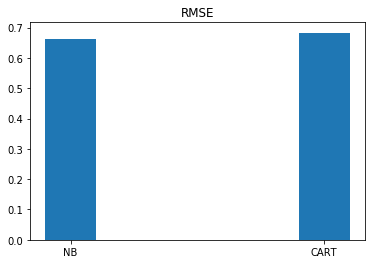

In [53]:
fig, ax = plt.subplots()
plt.bar(x, [NB_RMSE,CART_RMSE], width=0.2)
plt.xticks(x, ('NB', 'CART'))
plt.title("RMSE")

plt.show()

## Precision & recall visualisaion

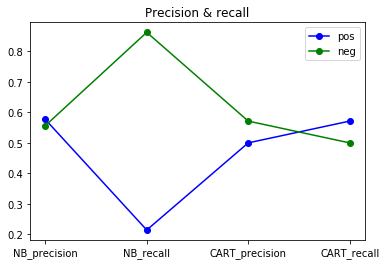

In [54]:
x = ('NB_precision','NB_recall', 'CART_precision','CART_recall')
y = [ [NB_precision_pos, NB_recall_pos, CART_precision_pos, CART_recall_pos], [NB_precision_neg, NB_recall_neg, CART_precision_neg, CART_recall_neg] ]
labels=['pos', 'neg']
colors=['b','g']

# loop over data, labels and colors
for i in range(len(y)):
    plt.plot(x,y[i],'o-',color=colors[i],label=labels[i])
plt.title("Precision & recall")

plt.legend()
plt.show()